<a href="https://colab.research.google.com/github/manchikantisowmya/ML_HARTH/blob/main/DATA245_harth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition, manifold, preprocessing, model_selection

### Parameters

In [ ]:
test_size = 0.2
train_size = 1 - test_size
random_seed = 42

class_code_to_class_name = {
    1: 'walking',
    2: 'running',
    3: 'shuffling',
    4: 'stairs (ascending)',
    5: 'stairs (descending)',
    6: 'standing',
    7: 'sitting',
    8: 'lying',
    13: 'cycling (sit)',
    14: 'cycling (stand)',
    130: 'cycling (sit, inactive)',
    140: 'cycling (stand, inactive)',
}

class_code_to_id = {}
id_to_class_code = {}
id_to_class_name = {}
for i, code in enumerate(class_code_to_class_name.keys()):
    class_code_to_id[code] = i
    id_to_class_code[i] = code
    id_to_class_name[i] = class_code_to_class_name[code]

num_classes = len(class_code_to_id)

In [ ]:
def remap_labels(y):
    '''Converts class codes into consecutive ids.'''
    remap_y = y.copy()
    for class_code, class_id in class_code_to_id.items():
        remap_y[y == class_code] = class_id
    return remap_y

X = np.load('/content/drive/Shareddrives/MSDA_245/project_group6/features.npy')
y_orig = np.load('/content/drive/Shareddrives/MSDA_245/project_group6/labels.npy')
y = remap_labels(y_orig)
print(y_orig)
print(X)
print(y)
print(f'Number of classes: {num_classes}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of samples: {X.shape[0]}')

[3 6 6 ... 2 2 2]
[[-9.82767513e-01 -5.58764552e-02  1.48729690e-01 ...  3.96101206e+00
   1.25335084e+00  2.09964484e+00]
 [-9.92211432e-01 -1.53813606e-02  1.05946789e-01 ...  4.25595010e-01
   2.49131866e-01  2.09435674e-01]
 [-9.92216084e-01 -7.46173849e-03  1.05972235e-01 ...  1.52418932e-01
   8.97586734e-02  1.10328930e-01]
 ...
 [-9.44031085e-01 -7.12622737e-02 -2.74585934e-01 ...  1.10748733e+02
   9.96269143e+01  5.87313548e+01]
 [-9.51699795e-01 -8.33493618e-02 -3.01743551e-01 ...  9.86363104e+01
   9.36047941e+01  5.27869047e+01]
 [-9.60515845e-01 -1.86145577e-02 -2.75431554e-01 ...  3.96338053e+01
   3.14776821e+01  3.36150595e+01]]
[2 5 5 ... 1 1 1]
Number of classes: 12
Number of features: 88
Number of samples: 25853


In [ ]:
def plot_class_distribution(y, ax, title):
    labels, counts = np.unique(y, return_counts=True)
    counts = counts / counts.sum()

    ax.bar(labels, counts, align='center')
    ax.set_xticks(list(id_to_class_name.keys()), list(id_to_class_name.values()), rotation=45, ha='right')
    ax.set_title(title)

### Create test set

Number of train samples: 20682
Number of test samples: 5171


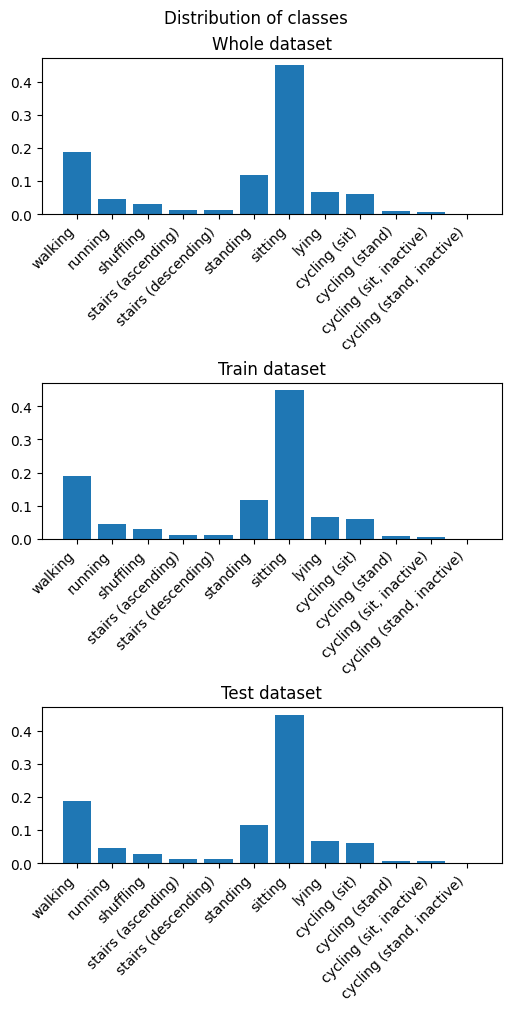

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    stratify=y,
                                                                    test_size=test_size,
                                                                    random_state=random_seed)
print(f'Number of train samples: {X_train.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

fig = plt.figure(figsize=(5, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 1)

ax = fig.add_subplot(gs[0, 0])
plot_class_distribution(y, ax, title='Whole dataset')

ax = fig.add_subplot(gs[1, 0])
plot_class_distribution(y, ax, title='Train dataset')

ax = fig.add_subplot(gs[2, 0])
plot_class_distribution(y, ax, title='Test dataset')

plt.suptitle('Distribution of classes')
plt.show()
plt.close()

### PCA

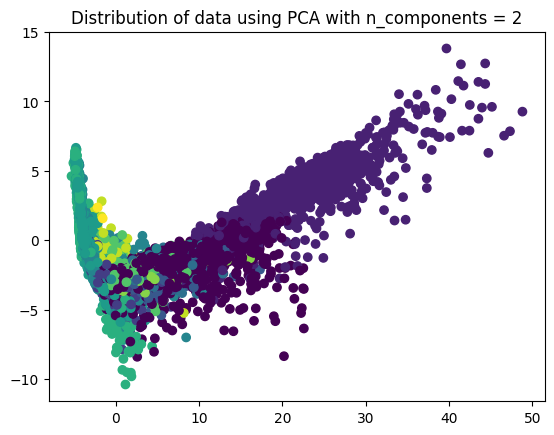

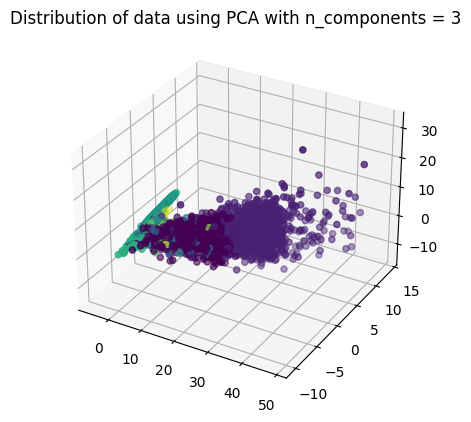

In [ ]:
def plot_pca(X, y, n_components):
    scaler = preprocessing.StandardScaler()
    scaler.fit(X)
    X_norm = scaler.transform(X)

    pca = decomposition.PCA(n_components=n_components)
    pca.fit(X_norm)
    X_pca = pca.transform(X_norm)

    X_list = [X_pca[:, i] for i in range(n_components)]

    if len(X_list) == 3:
        ax = plt.axes(projection='3d')
    else:
        ax = plt.axes()
    ax.scatter(*X_list, c=y)
    ax.set_title(f'Distribution of data using PCA with {n_components = }')
    plt.show()
    plt.close()

plot_pca(X_train, y_train, n_components=2)
plot_pca(X_train, y_train, n_components=3)

Running TSNE


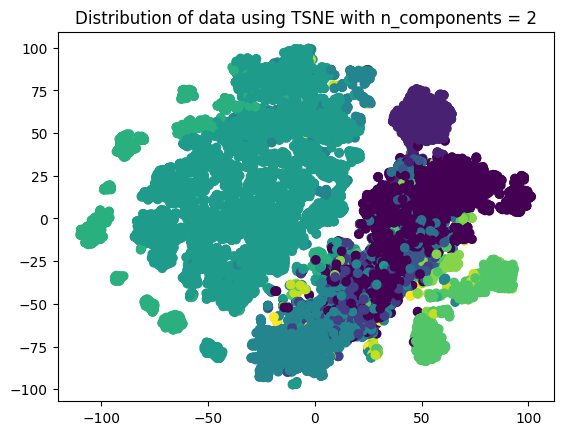

Running TSNE


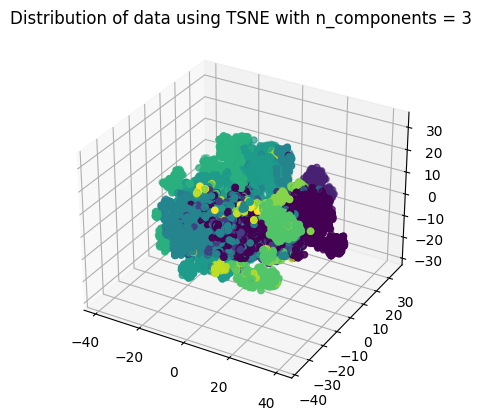

In [ ]:
def plot_tsne(X, y, n_components):
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    print('Running TSNE')
    tsne = manifold.TSNE(
        n_components=n_components,
        init='pca',
        learning_rate='auto',
        n_jobs=4,
        random_state=0,
    )
    X_tsne = tsne.fit_transform(X)
    X_list = [X_tsne[:, i] for i in range(n_components)]

    if len(X_list) == 3:
        ax = plt.axes(projection='3d')
    else:
        ax = plt.axes()
    ax.scatter(*X_list, c=y)
    ax.set_title(f'Distribution of data using TSNE with {n_components = }')
    plt.show()
    plt.close()

plot_tsne(X_train, y_train, n_components=2)
plot_tsne(X_train, y_train, n_components=3)

# Modeling


## Logistic Regression Model

In [ ]:
from sklearn import metrics as perfm
evalMetrics=dict()

In [ ]:
def evaluate_model(model, modelName, X_train, X_test, y_train, y_test):
    train_accuracy = perfm.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = perfm.accuracy_score(y_test, model.predict(X_test))

    train_precision = perfm.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = perfm.precision_score(y_test, model.predict(X_test),average='micro')

    train_recall = perfm.recall_score(y_train, model.predict(X_train),average='micro')
    test_recall = perfm.recall_score(y_test, model.predict(X_test),average='micro')

    evalMetrics[str(modelName)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Model:",str(modelName))
    print("----------------------")
    print("Training Accuracy {}".format(train_accuracy*100))
    print("Training Precesion {}".format(train_precision*100))
    print("Training Recall {}".format(train_recall*100))
    print("\n")
    print("Test Accuracy {}".format(test_accuracy*100))
    print("Test Precesion {}".format(test_precision*100))
    print("Test Recall {}".format(test_recall*100))

    #actual = y_test
    #predicted = model.predict(X_test)
    #confusion_matrix = perfm.confusion_matrix(actual, predicted)
    #cm_display = perfm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=class_code_to_class_name.values())

    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.grid(False)
    #cm_display.plot(ax=ax)

In [ ]:
from sklearn.linear_model import LogisticRegression

#Standard logistic regression:
lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)
evaluate_model(lr, "Logistic Regression Analysis", X_train, X_test, y_train, y_test)

Model: Logistic Regression Analysis
----------------------
Training Accuracy 74.28198433420366
Training Precesion 74.28198433420366
Training Recall 74.28198433420366



Test Accuracy 74.47302262618449
Test Precesion 74.47302262618449
Test Recall 74.47302262618449


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
